## Is my multiple choice test result better than random guessing?

<b>Hypothesis ($H_1$):</b> my score of 9 / 17 (~53%) in a multiple choice quiz with 3 selections is better than random guessing.

<b>Null Hypothesis ($H_0$):</b> my score is no better than random guessing

In [7]:
import random
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.pyplot as graph
from collections import Counter

In [2]:
# Function to generate quiz x times with random answers

def quizzer(n):
    results = []
    for i in range(1,n+1):
        random_answers = []
        for x in range(1,18):
            random_answers.append(random.randrange(1,4))
        results.append(random_answers)
    return results

def checker(results):
    answers = [3,1,3,3,3,3,2,2,2,2,2,3,2,3,2,1,1] #Answers to the quiz 
    score = []
    for result in results:
        grade = 0
        for i,a in enumerate(result):
            if answers[i] == a:
                grade += 1
        score.append(grade)
    return score

In [21]:
%%time
# Let computer do quiz 1 million times 
result_a = checker(quizzer(1000000))

CPU times: user 19.5 s, sys: 241 ms, total: 19.7 s
Wall time: 19.9 s


In [22]:
# Check results
result_counts = Counter(result_a)
print(result_counts)

Counter({5: 196730, 6: 196476, 7: 153163, 4: 150933, 8: 96864, 3: 86101, 9: 48219, 2: 34534, 10: 19245, 1: 8563, 11: 6237, 12: 1584, 0: 980, 13: 322, 14: 46, 15: 2, 16: 1})


In [24]:
# Get summary stats
mean = np.mean(result_a)
std = np.std(result_a)

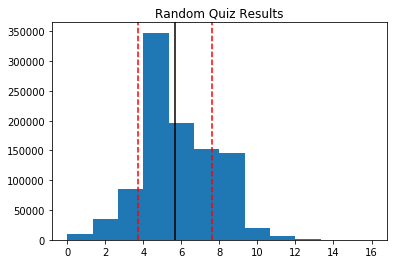

Mean: 5.668137
Standard Deviation: 1.9446284861718444


In [26]:
# Plot results
graph.hist(result_a, bins=12)
graph.title("Random Quiz Results")
graph.axvline(mean, color='black', linestyle='solid')
graph.axvline(mean-std, color='red', linestyle='dashed')
graph.axvline(mean+std, color='red', linestyle='dashed')
graph.show();

print(f'Mean: {mean}')
print(f'Standard Deviation: {std}')

In [27]:
#Calculate z score
z_score = (9 - mean)/std
print(f'z-score: {z_score}')

#Calculate p value using cumulative distribution function
print(f'p-value: {1 - norm.cdf(z_score)}')

z-score: 1.7133673725818124
p-value: 0.04332248743372069


We can therefore reject the null hypothesis that my quiz score was no better than random guessing :)